### 결정트리

In [1]:
# p106
from sklearn.linear_model import LinearRegression, LogisticRegression # 예측용/분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 분류용/예측용

In [29]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
#cancer = load_breast_cancer() # 유방암 데이터
cancer = load_iris()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9910714285714286, 0.9210526315789473)

In [31]:
# p108 트리 그림 그리기
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names,
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [32]:
# graphviz-2.38.msi 설치
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

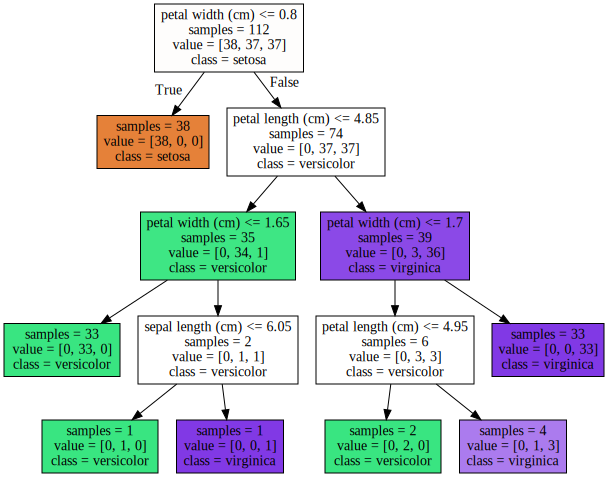

None

In [33]:
import graphviz # anaconda pormpt / pip install graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
g = display(graphviz.Source(dot_graph))
display(g)

In [35]:
# one-hot-encoding
import pandas as pd

In [36]:
df = pd.DataFrame(data=[[1,2,'man'],[2,3,'woman']], columns=['a','b','c'])
df

,a,b,c
0,1,2,man
1,2,3,woman


man은 1로, woman은 0으로 변환하면 안되요? 이유
 - man + man =2?
 - man과 woman의 중간은? (1+0)/2 = 0.5

In [37]:
pd.get_dummies(df)

,a,b,c_man,c_woman
0,1,2,1,0
1,2,3,0,1


- 시간은 범주(o)/ 연속: 0시~24시
- 연도는 범주 / 연속 2000년, 2001년, 2000년은 1000년과 3000년의 중간
- 사람의 키 - 연속
- 사람의 나이 - 연속, (미성년자, 성년): 범주